# Linear SVM Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [4]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non Linear SVM Classification

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [8]:
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# Polynomial Kernel

In [9]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# Gaussian RBF Kernel

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

#  SVM Regression

In [11]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [12]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

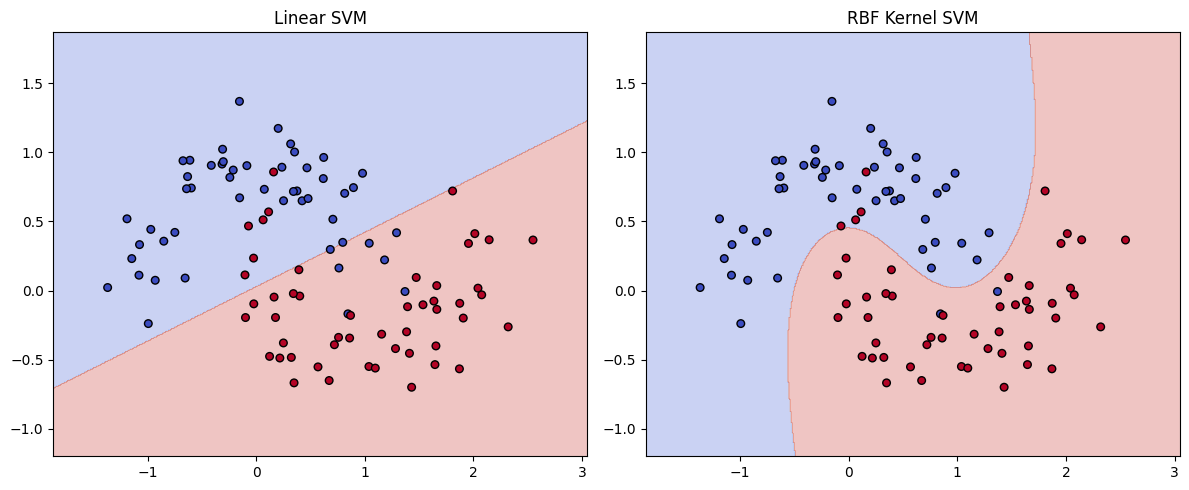

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Step 1: Generate non-linear data
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Step 2: Function to plot decision boundary
def plot_svm_decision_boundary(model, X, y, title, ax):
    x0s = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 500)
    x1s = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid).reshape(x0.shape)

    ax.contourf(x0, x1, y_pred, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# Step 3: Train both linear and RBF-kernel SVM
linear_svm = SVC(kernel="linear", C=1)
rbf_svm = SVC(kernel="rbf", C=1, gamma=1)

linear_svm.fit(X, y)
rbf_svm.fit(X, y)

# Step 4: Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_svm_decision_boundary(linear_svm, X, y, "Linear SVM", axes[0])
plot_svm_decision_boundary(rbf_svm, X, y, "RBF Kernel SVM", axes[1])
plt.tight_layout()
plt.show()


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Use a smaller subset for faster training/tuning
X_train_small, _, y_train_small, _ = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=42)
X_valid, y_valid = X[60000:], y[60000:]

# Build SVM classifier pipeline
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", gamma=0.05, C=5))  # Initial guess
])

# Train the classifier
svm_clf.fit(X_train_small, y_train_small)

# Evaluate on validation set
y_pred = svm_clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
accuracy


0.2119

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np

In [3]:
housing  = fetch_california_housing()
X, y = housing["data"], housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVR(kernel="poly", degree=3, C=1.0, epsilon=0.1))
])

In [7]:
svm_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(kernel='poly'))])

In [9]:
y_pred = svm_reg.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test is your true target values
baseline_predictions = np.full(len(y_test), np.mean(y_test))  # Mean baseline
# or
# baseline_predictions = np.full(len(y_test), np.median(y_test))  # Median baseline

baseline_mse = mean_squared_error(y_test, baseline_predictions)
print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 1.3104089782408996
